# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech
- Nama: Ahmad Kholish Fauzan Shobiry
- Email: shobiry2000@gmail.com
- Id Dicoding: fauzan_shobi

# Persiapan

## Menyiapkan library yang dibutuhkan

In [73]:
# Manipulasi dan analisis data
import pandas as pd

# Visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Pra-pemrosesan
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance

# Pengaturan tampilan
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

## Menyiapkan data yang akan digunakan

In [74]:
# Load data dari file CSV
df = pd.read_csv('data.csv', delimiter=';')

# Tampilkan 5 baris pertama untuk memastikan data berhasil dimuat
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# Data Understanding

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

Berikut variabel-variabel dalam dataset:
1. Marital_status:	Status pernikahan mahasiswa (misalnya: lajang, menikah).
2. Application_mode:	Cara mahasiswa mendaftar (jalur masuk tertentu seperti online, seleksi nasional, dll).
3. Application_order:	Urutan pilihan program studi saat mendaftar (pilihan ke-1, ke-2, dll).
4. Course:	Program studi atau jurusan yang dipilih.
5. Daytime_evening_attendance:	Waktu kuliah(kelas pagi/siang atau malam).
6. Previous_qualification:	Jenis pendidikan terakhir sebelum masuk universitas.
7. Previous_qualification_grade:	Nilai akhir dari pendidikan sebelumnya (misalnya nilai SMA).
8. Nacionality:	Kewarganegaraan mahasiswa.
9. Mothers_qualification:	Tingkat pendidikan terakhir ibu.
10. Fathers_qualification:	Tingkat pendidikan terakhir ayah.
11. Mothers_occupation:	Jenis pekerjaan ibu.
12. Fathers_occupation:	Jenis pekerjaan ayah.
13. Admission_grade:	Nilai seleksi masuk universitas.
14. Displaced:	Apakah mahasiswa termasuk pengungsi atau korban relokasi.
15. Educational_special_needs:	Apakah mahasiswa memiliki kebutuhan pendidikan khusus.
16. Debtor:	Apakah mahasiswa memiliki tunggakan pembayaran.
17. Tuition_fees_up_to_date:	Apakah mahasiswa telah membayar biaya kuliah tepat waktu.
18. Gender:	Jenis kelamin mahasiswa.
19. Scholarship_holder:	Apakah mahasiswa menerima beasiswa.
20. Age_at_enrollment:	Usia mahasiswa saat pertama kali mendaftar.
21. International:	Apakah mahasiswa merupakan mahasiswa internasional.
22. Curricular_units_1st_sem_credited:	Jumlah SKS yang diakui di semester 1.
23. Curricular_units_1st_sem_enrolled:	Jumlah mata kuliah yang diambil di semester 1.
24. Curricular_units_1st_sem_evaluations:	Jumlah mata kuliah yang dinilai di semester 1.
25. Curricular_units_1st_sem_approved:	Jumlah mata kuliah yang lulus di semester 1.
26. Curricular_units_1st_sem_grade:	Rata-rata nilai semester 1.
27. Curricular_units_1st_sem_without_evaluations:	Mata kuliah semester 1 tanpa penilaian.
28. Curricular_units_2nd_sem_credited:	Jumlah SKS yang diakui di semester 2.
29. Curricular_units_2nd_sem_enrolled:	Jumlah mata kuliah yang diambil di semester 2.
30. Curricular_units_2nd_sem_evaluations:	Jumlah mata kuliah yang dinilai di semester 2.
31. Curricular_units_2nd_sem_approved:	Jumlah mata kuliah yang lulus di semester 2.
32. Curricular_units_2nd_sem_grade:	Rata-rata nilai semester 2.
33. Curricular_units_2nd_sem_without_evaluations:	Mata kuliah semester 2 tanpa penilaian.
34. Unemployment_rate:	Tingkat pengangguran nasional saat itu.
35. Inflation_rate:	Tingkat inflasi nasional saat itu.
36. GDP:	Produk domestik bruto saat itu (biasanya dalam jutaan/miliar).
37. Status:	Status akhir mahasiswa (misalnya: graduate, dropout, enrolled).

Berdasarkan `df.info()` di atas, dataset tidak memiliki missing value atau nilai NaN. Mari kita pastikan kembali apakah dataset memiliki nilai NaN atau juga nilai Duplikasi.

In [76]:
# Mengecek jumlah missing value per kolom
missing_values = df.isnull().sum()

# Mengecek jumlah total data yang duplikat (baris)
duplicate_rows = df.duplicated().sum()

# Menampilkan hasil
print("Jumlah missing value per kolom:\n", missing_values)
print("\nJumlah baris duplikat:", duplicate_rows)

Jumlah missing value per kolom:
 Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment

> Berdasalkan pengecekan ulang di atas, maka dapat divalidasi kembali bahwa dataset telah bersih dari Missing Value dan Duplicated Data. Sehingga data siap diolah.

Pada bagian di bawah ini saya ingin mengetahui proporsi persebaran status mahasiswa dari data keseluruhan, sehingga dapat memberikan gambaran awal persentase siswa yang telah lulus, dropout, dan terdaftar.

In [77]:
df['Status'].value_counts(normalize=True)

,proportion
Status,
Graduate,0.499322
Dropout,0.321203
Enrolled,0.179476


Berdasarkan pengecekan di atas, dapat diketahui bahwa:
1. `Graduate` : Siswa yang lulus memiliki persentasi sebanyak 50% dari total seluruh siswa di sekolah.
2. `Droput` : Siswa yang droput berjumlah sebanyak 32% dari total siswa keseluruhan.
3. `Enrolled`: Siswa yang terdaftar hanya sekitar 18%.

Dari data ini perlu diketahui bahwa sekolah memiliki masalah yang cukup serius sebab siswa droputnya sebanyak 32% yang merupakan angka yang signifikan.

---

Selanjutnya yakni melakukan EDA Analysis, disini saya menggunakan EDA Univariate yang akan melihat distribusi isi data pada tiap kolom/variabel.


📊 EDA Univariate: Marital_status
Tipe data: int64
count    4424.000000
mean        1.178571
std         0.605747
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         6.000000
Name: Marital_status, dtype: float64


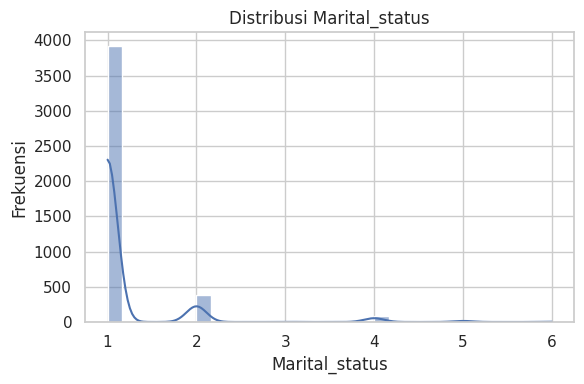


📊 EDA Univariate: Application_mode
Tipe data: int64
count    4424.000000
mean       18.669078
std        17.484682
min         1.000000
25%         1.000000
50%        17.000000
75%        39.000000
max        57.000000
Name: Application_mode, dtype: float64


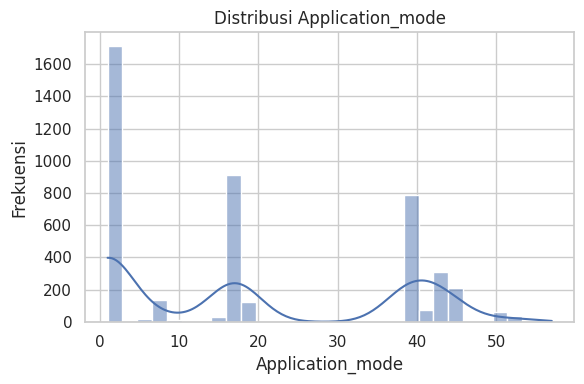


📊 EDA Univariate: Application_order
Tipe data: int64
count    4424.000000
mean        1.727848
std         1.313793
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: Application_order, dtype: float64


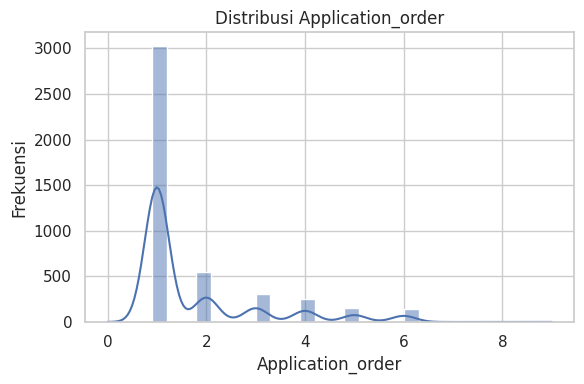


📊 EDA Univariate: Course
Tipe data: int64
count    4424.000000
mean     8856.642631
std      2063.566416
min        33.000000
25%      9085.000000
50%      9238.000000
75%      9556.000000
max      9991.000000
Name: Course, dtype: float64


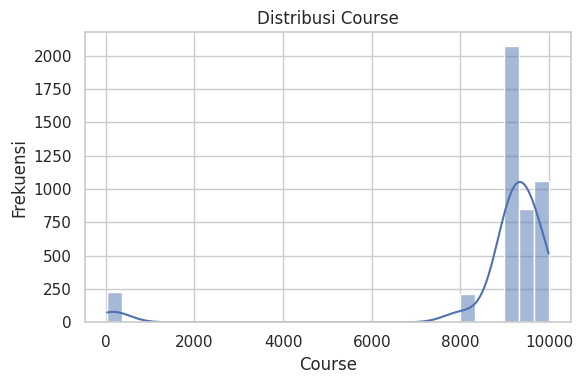


📊 EDA Univariate: Daytime_evening_attendance
Tipe data: int64
count    4424.000000
mean        0.890823
std         0.311897
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Daytime_evening_attendance, dtype: float64


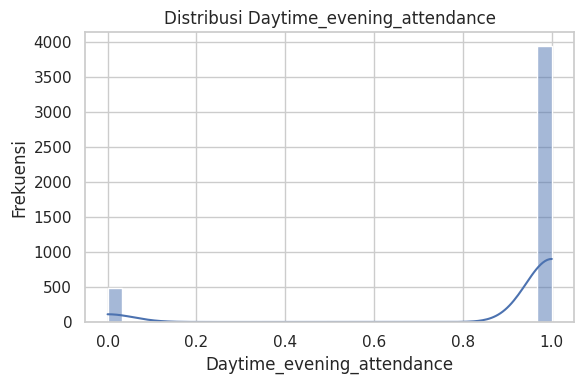


📊 EDA Univariate: Previous_qualification
Tipe data: int64
count    4424.000000
mean        4.577758
std        10.216592
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        43.000000
Name: Previous_qualification, dtype: float64


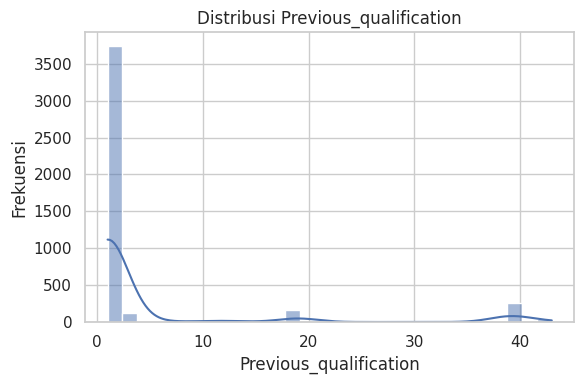


📊 EDA Univariate: Previous_qualification_grade
Tipe data: float64
count    4424.000000
mean      132.613314
std        13.188332
min        95.000000
25%       125.000000
50%       133.100000
75%       140.000000
max       190.000000
Name: Previous_qualification_grade, dtype: float64


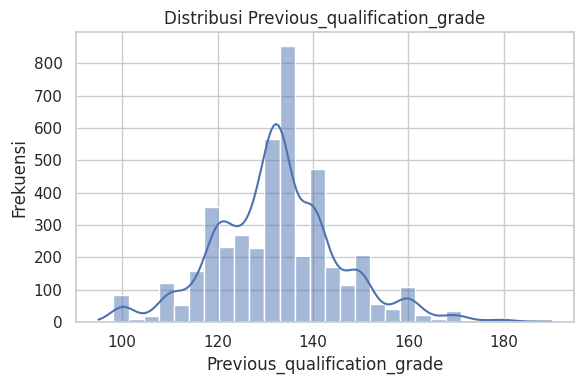


📊 EDA Univariate: Nacionality
Tipe data: int64
count    4424.000000
mean        1.873192
std         6.914514
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       109.000000
Name: Nacionality, dtype: float64


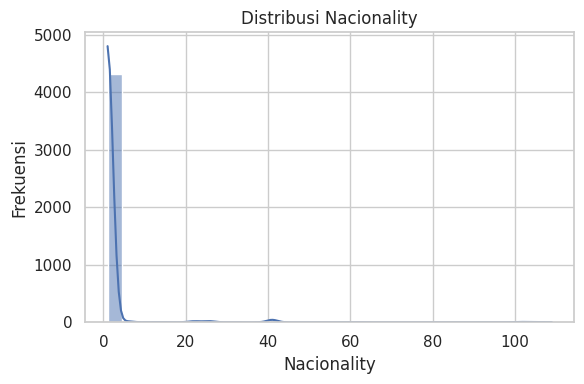


📊 EDA Univariate: Mothers_qualification
Tipe data: int64
count    4424.000000
mean       19.561935
std        15.603186
min         1.000000
25%         2.000000
50%        19.000000
75%        37.000000
max        44.000000
Name: Mothers_qualification, dtype: float64


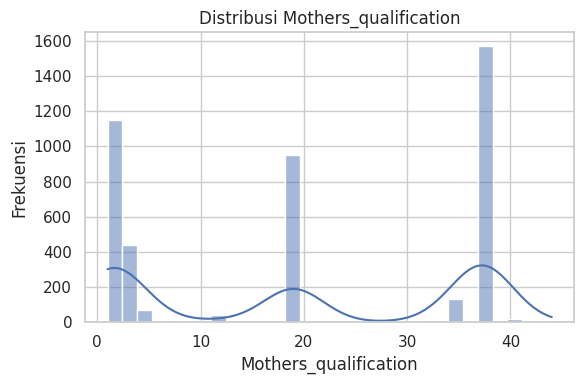


📊 EDA Univariate: Fathers_qualification
Tipe data: int64
count    4424.000000
mean       22.275316
std        15.343108
min         1.000000
25%         3.000000
50%        19.000000
75%        37.000000
max        44.000000
Name: Fathers_qualification, dtype: float64


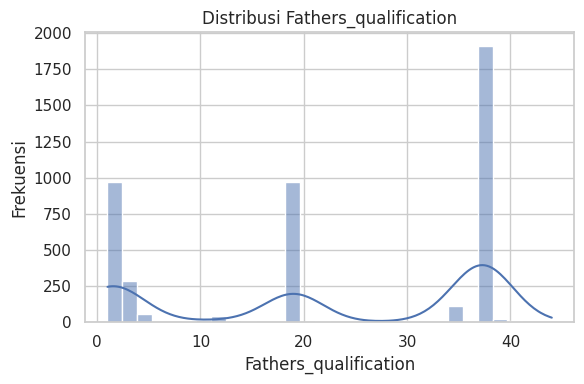


📊 EDA Univariate: Mothers_occupation
Tipe data: int64
count    4424.000000
mean       10.960895
std        26.418253
min         0.000000
25%         4.000000
50%         5.000000
75%         9.000000
max       194.000000
Name: Mothers_occupation, dtype: float64


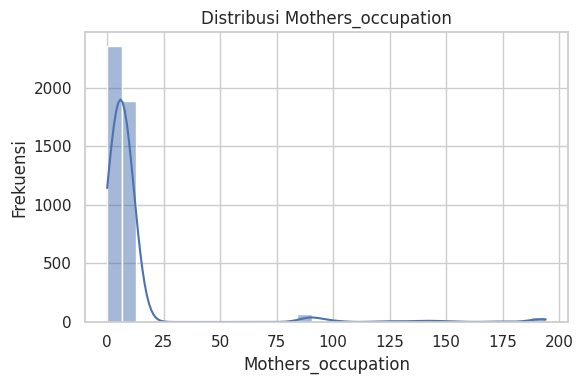


📊 EDA Univariate: Fathers_occupation
Tipe data: int64
count    4424.000000
mean       11.032324
std        25.263040
min         0.000000
25%         4.000000
50%         7.000000
75%         9.000000
max       195.000000
Name: Fathers_occupation, dtype: float64


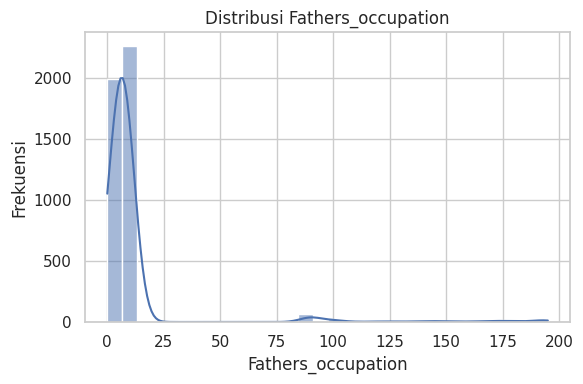


📊 EDA Univariate: Admission_grade
Tipe data: float64
count    4424.000000
mean      126.978119
std        14.482001
min        95.000000
25%       117.900000
50%       126.100000
75%       134.800000
max       190.000000
Name: Admission_grade, dtype: float64


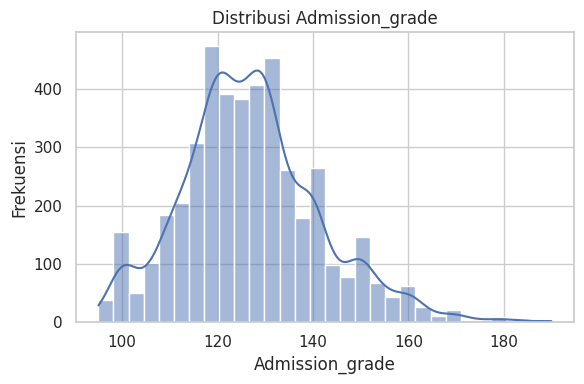


📊 EDA Univariate: Displaced
Tipe data: int64
count    4424.000000
mean        0.548373
std         0.497711
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Displaced, dtype: float64


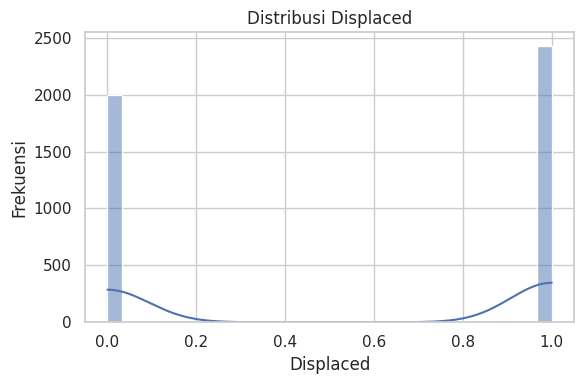


📊 EDA Univariate: Educational_special_needs
Tipe data: int64
count    4424.000000
mean        0.011528
std         0.106760
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Educational_special_needs, dtype: float64


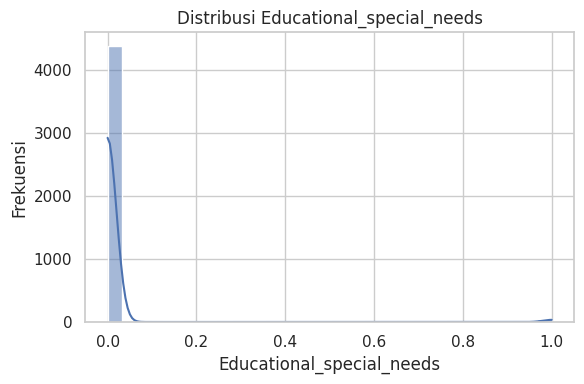


📊 EDA Univariate: Debtor
Tipe data: int64
count    4424.000000
mean        0.113698
std         0.317480
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Debtor, dtype: float64


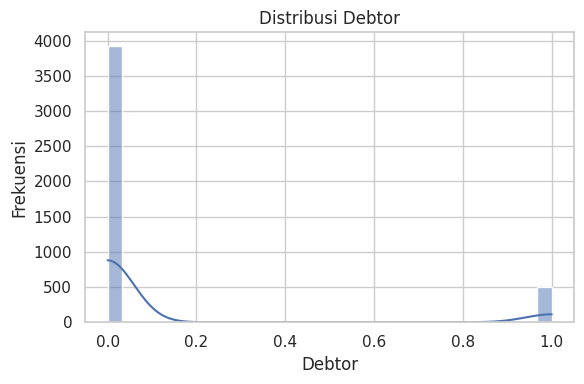


📊 EDA Univariate: Tuition_fees_up_to_date
Tipe data: int64
count    4424.000000
mean        0.880651
std         0.324235
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Tuition_fees_up_to_date, dtype: float64


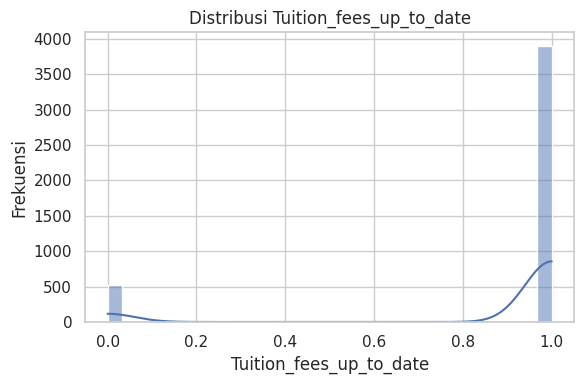


📊 EDA Univariate: Gender
Tipe data: int64
count    4424.000000
mean        0.351718
std         0.477560
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Gender, dtype: float64


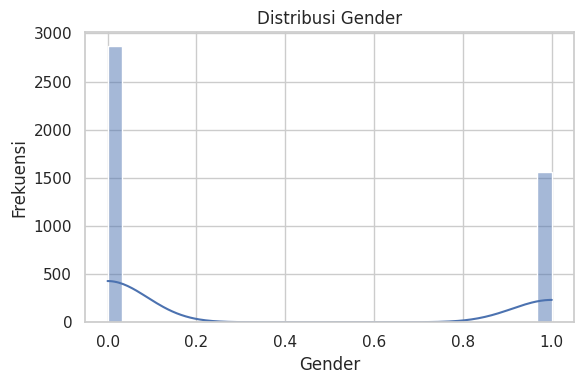


📊 EDA Univariate: Scholarship_holder
Tipe data: int64
count    4424.000000
mean        0.248418
std         0.432144
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Scholarship_holder, dtype: float64


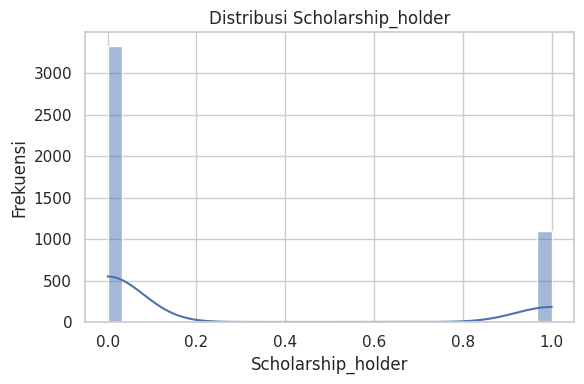


📊 EDA Univariate: Age_at_enrollment
Tipe data: int64
count    4424.000000
mean       23.265145
std         7.587816
min        17.000000
25%        19.000000
50%        20.000000
75%        25.000000
max        70.000000
Name: Age_at_enrollment, dtype: float64


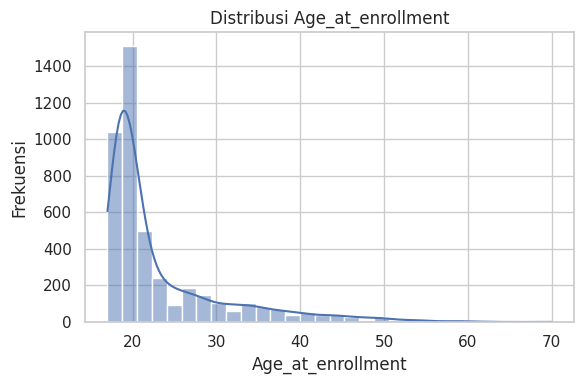


📊 EDA Univariate: International
Tipe data: int64
count    4424.000000
mean        0.024864
std         0.155729
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: International, dtype: float64


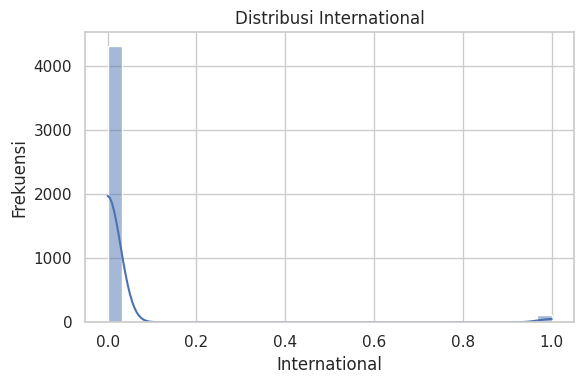


📊 EDA Univariate: Curricular_units_1st_sem_credited
Tipe data: int64
count    4424.000000
mean        0.709991
std         2.360507
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        20.000000
Name: Curricular_units_1st_sem_credited, dtype: float64


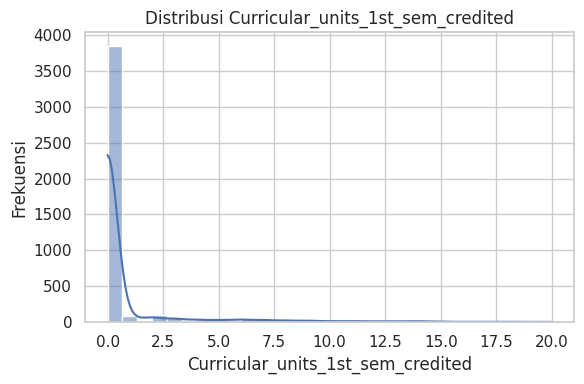


📊 EDA Univariate: Curricular_units_1st_sem_enrolled
Tipe data: int64
count    4424.000000
mean        6.270570
std         2.480178
min         0.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        26.000000
Name: Curricular_units_1st_sem_enrolled, dtype: float64


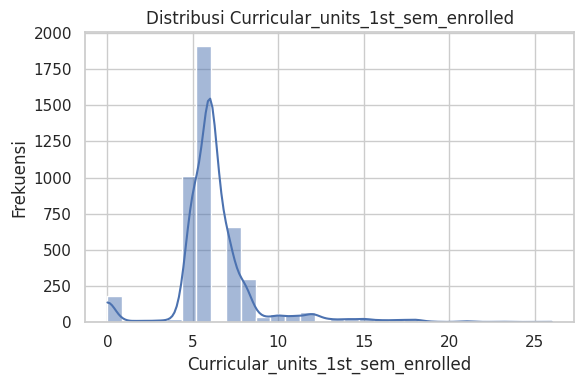


📊 EDA Univariate: Curricular_units_1st_sem_evaluations
Tipe data: int64
count    4424.000000
mean        8.299051
std         4.179106
min         0.000000
25%         6.000000
50%         8.000000
75%        10.000000
max        45.000000
Name: Curricular_units_1st_sem_evaluations, dtype: float64


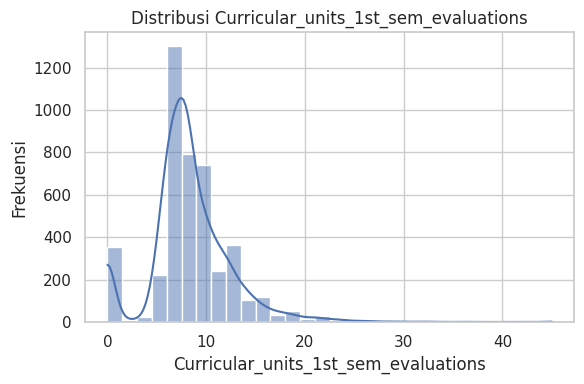


📊 EDA Univariate: Curricular_units_1st_sem_approved
Tipe data: int64
count    4424.000000
mean        4.706600
std         3.094238
min         0.000000
25%         3.000000
50%         5.000000
75%         6.000000
max        26.000000
Name: Curricular_units_1st_sem_approved, dtype: float64


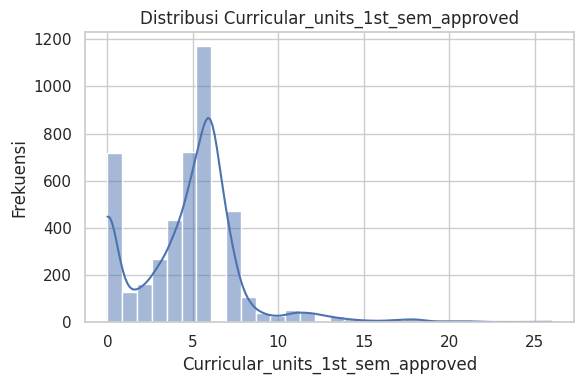


📊 EDA Univariate: Curricular_units_1st_sem_grade
Tipe data: float64
count    4424.000000
mean       10.640822
std         4.843663
min         0.000000
25%        11.000000
50%        12.285714
75%        13.400000
max        18.875000
Name: Curricular_units_1st_sem_grade, dtype: float64


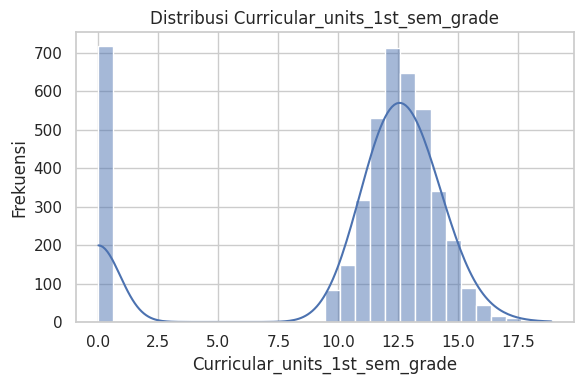


📊 EDA Univariate: Curricular_units_1st_sem_without_evaluations
Tipe data: int64
count    4424.000000
mean        0.137658
std         0.690880
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        12.000000
Name: Curricular_units_1st_sem_without_evaluations, dtype: float64


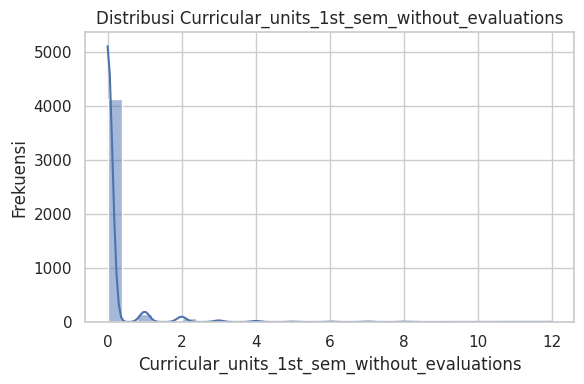


📊 EDA Univariate: Curricular_units_2nd_sem_credited
Tipe data: int64
count    4424.000000
mean        0.541817
std         1.918546
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        19.000000
Name: Curricular_units_2nd_sem_credited, dtype: float64


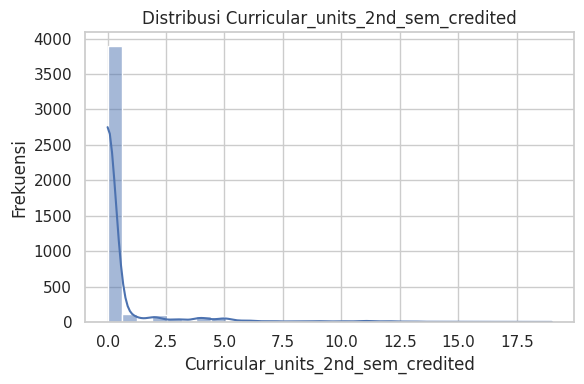


📊 EDA Univariate: Curricular_units_2nd_sem_enrolled
Tipe data: int64
count    4424.000000
mean        6.232143
std         2.195951
min         0.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        23.000000
Name: Curricular_units_2nd_sem_enrolled, dtype: float64


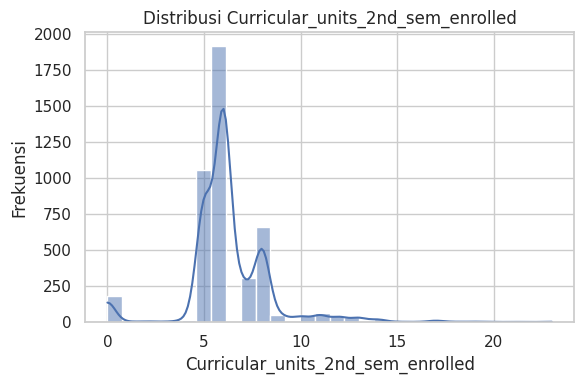


📊 EDA Univariate: Curricular_units_2nd_sem_evaluations
Tipe data: int64
count    4424.000000
mean        8.063291
std         3.947951
min         0.000000
25%         6.000000
50%         8.000000
75%        10.000000
max        33.000000
Name: Curricular_units_2nd_sem_evaluations, dtype: float64


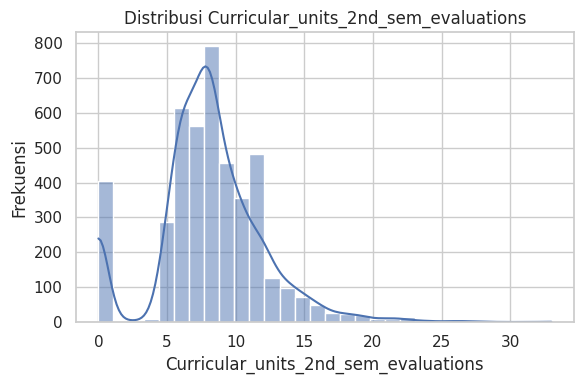


📊 EDA Univariate: Curricular_units_2nd_sem_approved
Tipe data: int64
count    4424.000000
mean        4.435805
std         3.014764
min         0.000000
25%         2.000000
50%         5.000000
75%         6.000000
max        20.000000
Name: Curricular_units_2nd_sem_approved, dtype: float64


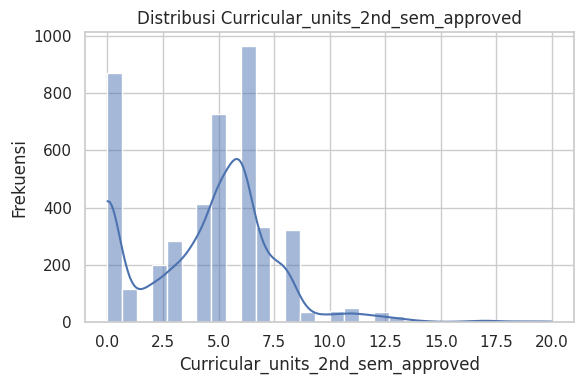


📊 EDA Univariate: Curricular_units_2nd_sem_grade
Tipe data: float64
count    4424.000000
mean       10.230206
std         5.210808
min         0.000000
25%        10.750000
50%        12.200000
75%        13.333333
max        18.571429
Name: Curricular_units_2nd_sem_grade, dtype: float64


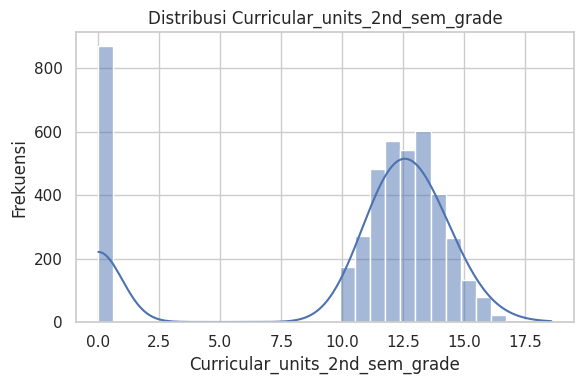


📊 EDA Univariate: Curricular_units_2nd_sem_without_evaluations
Tipe data: int64
count    4424.000000
mean        0.150316
std         0.753774
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        12.000000
Name: Curricular_units_2nd_sem_without_evaluations, dtype: float64


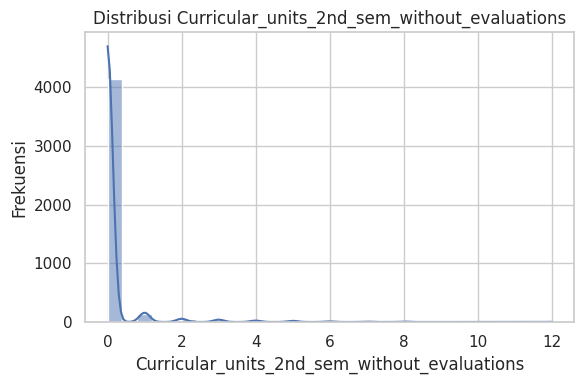


📊 EDA Univariate: Unemployment_rate
Tipe data: float64
count    4424.000000
mean       11.566139
std         2.663850
min         7.600000
25%         9.400000
50%        11.100000
75%        13.900000
max        16.200000
Name: Unemployment_rate, dtype: float64


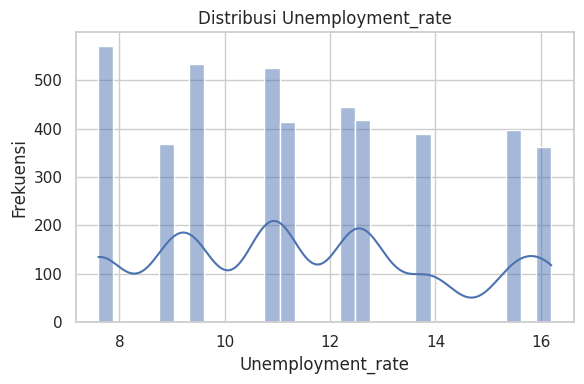


📊 EDA Univariate: Inflation_rate
Tipe data: float64
count    4424.000000
mean        1.228029
std         1.382711
min        -0.800000
25%         0.300000
50%         1.400000
75%         2.600000
max         3.700000
Name: Inflation_rate, dtype: float64


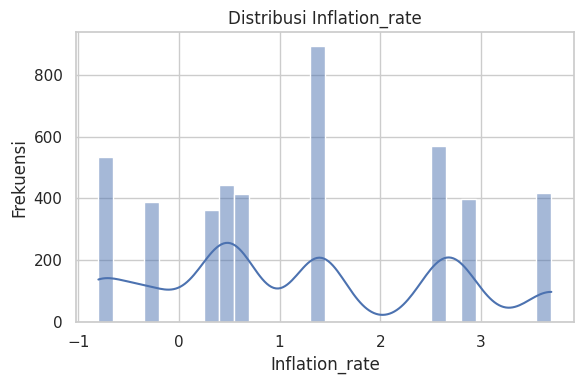


📊 EDA Univariate: GDP
Tipe data: float64
count    4424.000000
mean        0.001969
std         2.269935
min        -4.060000
25%        -1.700000
50%         0.320000
75%         1.790000
max         3.510000
Name: GDP, dtype: float64


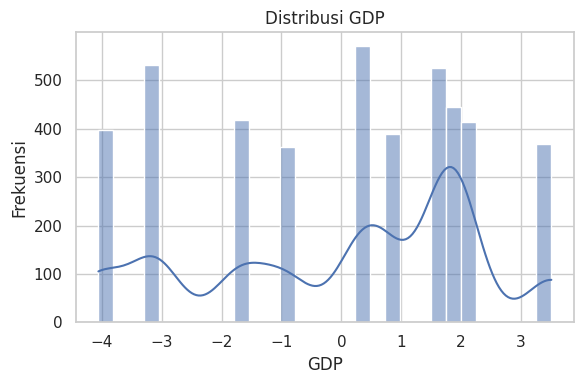


📊 EDA Univariate: Status
Tipe data: object
Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


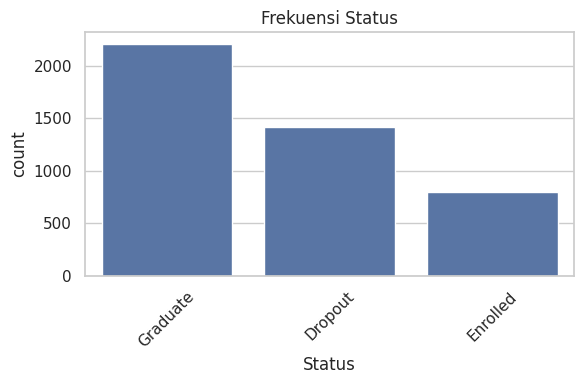

In [78]:
# EDA Univariate

for col in df.columns:
    print(f'\n📊 EDA Univariate: {col}')
    print(f'Tipe data: {df[col].dtype}')

    if pd.api.types.is_numeric_dtype(df[col]):
        print(df[col].describe())
        plt.figure(figsize=(6, 4))
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Distribusi {col}')
        plt.xlabel(col)
        plt.ylabel('Frekuensi')
        plt.tight_layout()
        plt.show()

    elif pd.api.types.is_categorical_dtype(df[col]) or pd.api.types.is_object_dtype(df[col]):
        print(df[col].value_counts())
        plt.figure(figsize=(6, 4))
        sns.countplot(x=col, data=df, order=df[col].value_counts().index)
        plt.title(f'Frekuensi {col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    else:
        print('Tipe data tidak dianalisis.')

Hasil analisis EDA Univariate di atas adalah sebagai berikut:
1. Mayoritas fitur bertipe int64, mewakili kategori atau status biner, dengan nilai dominan biasanya di angka 0 atau 1.

2. Fitur kategorikal seperti Marital_status, Application_mode, Previous_qualification, dan Nationality menunjukkan distribusi sangat tidak merata—median dan kuartil sering di nilai minimum, mengindikasikan kategori dominan.

3. Fitur Previous_qualification_grade dan Admission_grade (tipe float64) menunjukkan nilai akademik dengan sebaran normal ringan, mean sekitar 127–133, dan nilai maksimum 190.

4. Fitur seperti Mothers_occupation, Fathers_occupation memiliki sebaran lebar (max >190), namun median rendah, menandakan outlier signifikan.

4. Fitur biner (Displaced, Debtor, Scholarship_holder, dll.) mayoritas bernilai 0, menunjukkan populasi yang sangat tidak seimbang.

5. Age_at_enrollment memiliki rentang luas (17–70), namun mayoritas siswa berusia sekitar 20 tahun.

6. International sangat jarang (mean 0.02), menunjukkan mayoritas siswa adalah lokal.

# Data Preparation/Preprocessing

Sebagai target prediksi, maka kolom `Status` yang bersifat kategorikal akan diubah menjadi nilai numerik, guna untuk pemodelan ML dan analisis statistik data.

In [79]:
# Mapping untuk Status
df['Status'] = df['Status'].map({
    'Graduate': 0,
    'Enrolled': 1,
    'Dropout': 2
})

Kode di bawah akan membagi dua daftar (list), `categorical_cols` akan berisi nama-nama kolom dengan data bertipe kategori diskrit (nominal atau ordinal). Nilai-nilainya biasanya berupa kode angka yang mewakili status tertentu (contoh `Gender`: 0 = Laki-laki, 1 = Perempuan).

`numerical_cols` berisi nama-nama kolom dengan data bertipe angka kontinu atau diskrit yang memiliki makna kuantitatif.

Hal ini dilakukan untuk memudahkan preprocessing seperti encoding untuk kategori, dan standarisasi.

In [80]:
categorical_cols = [
    'Marital_status', 'Application_mode', 'Application_order', 'Course',
    'Daytime_evening_attendance', 'Previous_qualification', 'Nacionality',
    'Mothers_qualification', 'Fathers_qualification',
    'Mothers_occupation', 'Fathers_occupation', 'Displaced',
    'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date',
    'Gender', 'Scholarship_holder', 'International'
]

numerical_cols = [
    'Previous_qualification_grade', 'Admission_grade', 'Age_at_enrollment',
    'Curricular_units_1st_sem_credited', 'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_evaluations', 'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade', 'Curricular_units_1st_sem_without_evaluations',
    'Curricular_units_2nd_sem_credited', 'Curricular_units_2nd_sem_enrolled',
    'Curricular_units_2nd_sem_evaluations', 'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade', 'Curricular_units_2nd_sem_without_evaluations',
    'Unemployment_rate', 'Inflation_rate', 'GDP'
]

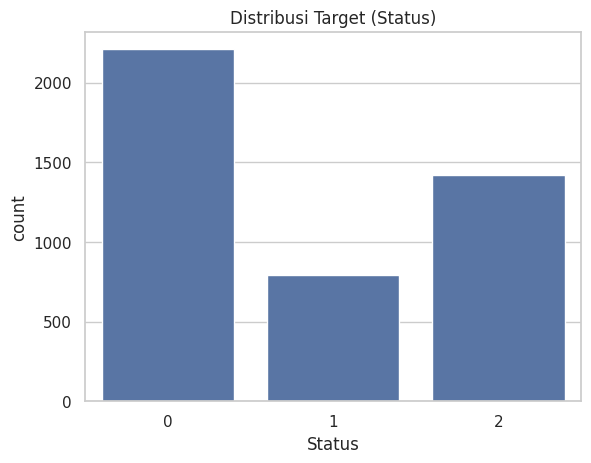

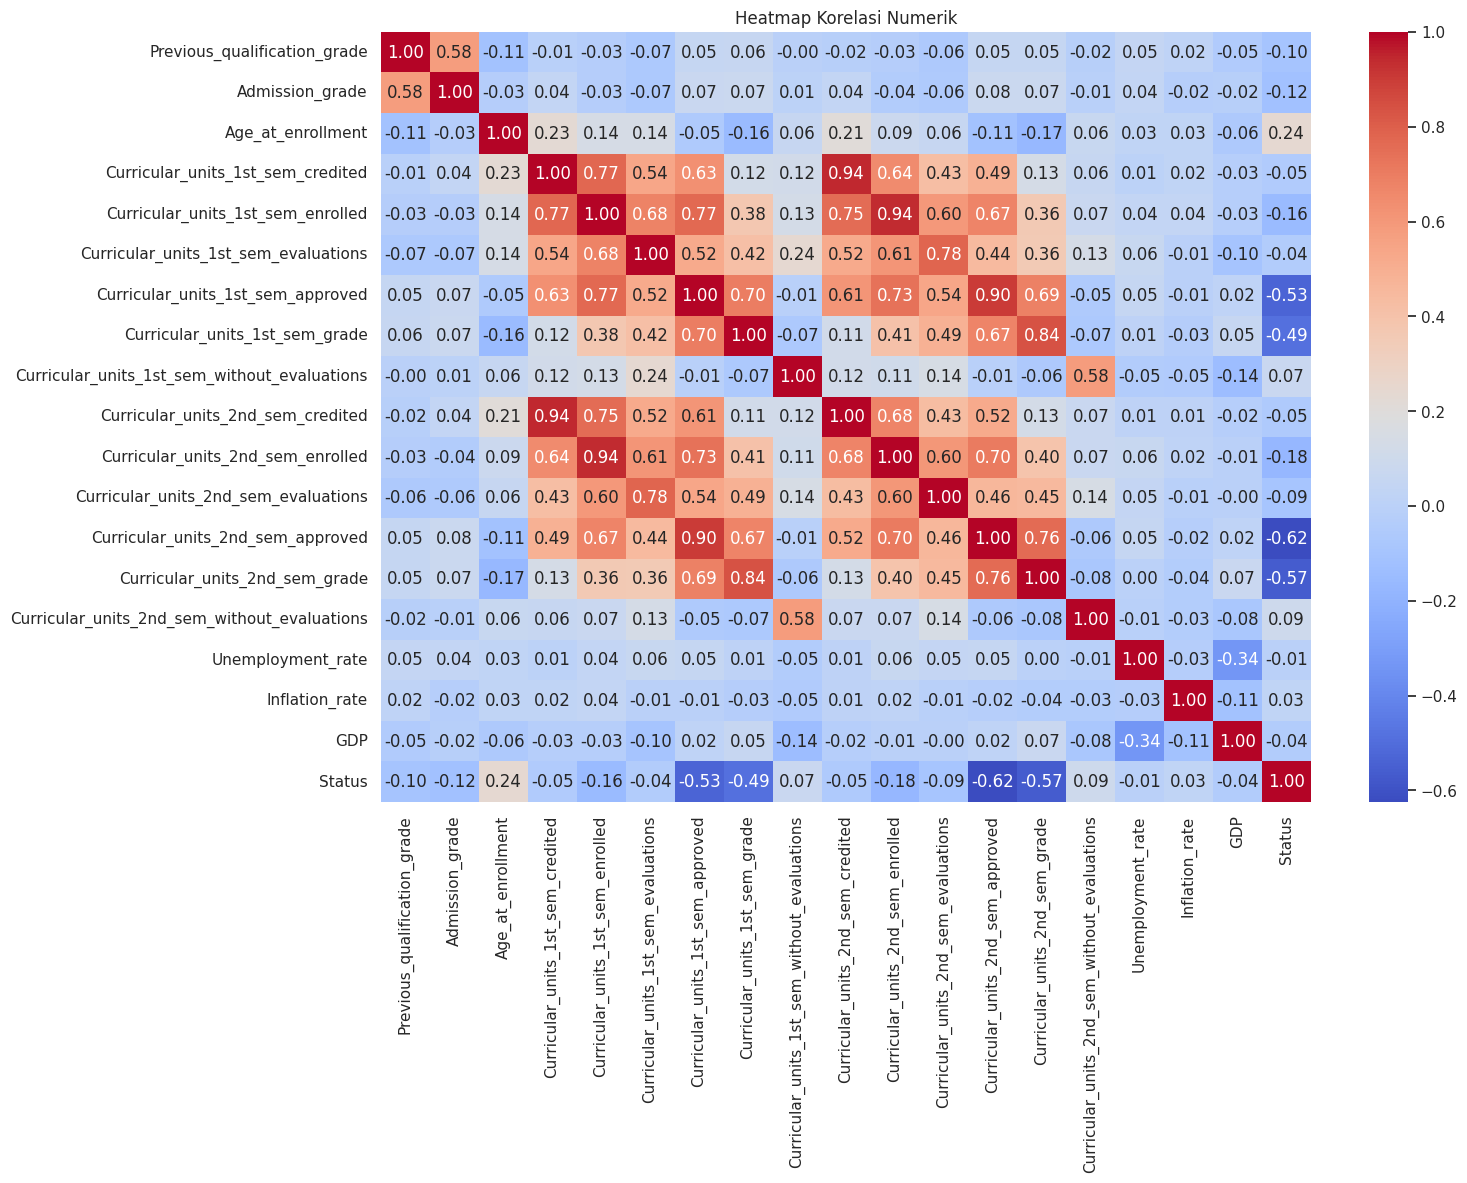

In [81]:
# Distribusi Status
sns.countplot(x='Status', data=df)
plt.title("Distribusi Target (Status)")
plt.show()

# Korelasi numerik
plt.figure(figsize=(15,10))
sns.heatmap(df[numerical_cols + ['Status']].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap Korelasi Numerik")
plt.show()

Berdasarkan heatmap korelasi di atas, bisa disimpulkan adanya beberapa variabel yang memiliki korelasi kuat (positif atau negatif) terhadap kolom Status (target prediksi), yaitu:

1. Korelasi Negatif Kuat (semakin tinggi nilai variabel, semakin kecil kemungkinan dropout)
<br> Korelasi negatif berarti semakin tinggi nilai fitur tersebut, semakin rendah nilai Status (ingat: Graduate = 0, Enrolled = 1, Dropout = 2)
  - Curricular_units_2nd_sem_approved: -0.62
  - Curricular_units_1st_sem_approved: -0.53
  - Curricular_units_2nd_sem_grade: -0.57
  - Curricular_units_1st_sem_grade: -0.49
Artinya, mahasiswa dengan lebih banyak mata kuliah lulus dan nilai tinggi cenderung lulus, bukan dropout.

2. Korelasi Positif Rendah
  - Age_at_enrollment: 0.24
<br> Artinya, semakin tua usia saat mendaftar, ada sedikit kecenderungan lebih tinggi untuk dropout.

**Kesimpulan utama:**
<br> Variabel akademik seperti jumlah mata kuliah yang lulus dan nilai (baik semester 1 maupun 2) sangat berpengaruh terhadap kelulusan atau dropout. Umur juga sedikit memengaruhi, tapi tidak sekuat performa akademik.

In [82]:
# Mengubah data kategorikal menjadi data numerik menggunakan LabelEncoder dari sklearn
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

Melakukan normalisasi fitur numerik dengan tujuan:
1. Menyamakan skala nilai di seluruh fitur numerik (scaling).
2. Mempermudah kinerja model.
3. Menghindari bias sebab rentang atau skala yang lebih besar tidak akan mendominasi algoritma.

In [83]:
# Normalisasi fitur numerik
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [84]:
# Menyiapkan data untuk Modelling
X = df.drop('Status', axis=1)
y = df['Status']

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Modelling

Pada tahap modelling ini, saya menggunakan 3 model antara lain Random Forest, XGBoost, dan Gradient Boosting untuk melatih hasil prediksi data terhadap fitur target (`Status`).

In [85]:
# Inisialisasi dan latih model Random Forest
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Prediksi hasil
y_pred_rf = model_rf.predict(X_test)

# Evaluasi model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf, target_names=['Graduate', 'Enrolled', 'Dropout']))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.7819209039548023

Classification Report:
               precision    recall  f1-score   support

    Graduate       0.79      0.93      0.85       442
    Enrolled       0.59      0.40      0.48       159
     Dropout       0.85      0.77      0.81       284

    accuracy                           0.78       885
   macro avg       0.74      0.70      0.71       885
weighted avg       0.77      0.78      0.77       885


Confusion Matrix:
 [[411  21  10]
 [ 67  63  29]
 [ 44  22 218]]


In [86]:
# Inisialisasi dan latih model XGBoost
model = XGBClassifier(objective='multi:softmax', num_class=3, eval_metric='mlogloss', use_label_encoder=False, random_state=42)
model.fit(X_train, y_train)

# Prediksi hasil
y_pred = model.predict(X_test)

# Evaluasi model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Graduate', 'Enrolled', 'Dropout']))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7740112994350282

Classification Report:
               precision    recall  f1-score   support

    Graduate       0.80      0.89      0.84       442
    Enrolled       0.56      0.42      0.48       159
     Dropout       0.82      0.79      0.80       284

    accuracy                           0.77       885
   macro avg       0.73      0.70      0.71       885
weighted avg       0.76      0.77      0.77       885


Confusion Matrix:
 [[394  30  18]
 [ 60  66  33]
 [ 38  21 225]]


In [87]:
# Inisialisasi dan latih model GBM
model_gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model_gbm.fit(X_train, y_train)

# Prediksi hasil
y_pred_gbm = model_gbm.predict(X_test)

# Evaluasi model
print("GBM Accuracy:", accuracy_score(y_test, y_pred_gbm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gbm, target_names=['Graduate', 'Enrolled', 'Dropout']))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_gbm))

GBM Accuracy: 0.7785310734463277

Classification Report:
               precision    recall  f1-score   support

    Graduate       0.79      0.92      0.85       442
    Enrolled       0.56      0.40      0.46       159
     Dropout       0.85      0.78      0.81       284

    accuracy                           0.78       885
   macro avg       0.73      0.70      0.71       885
weighted avg       0.77      0.78      0.77       885


Confusion Matrix:
 [[405  27  10]
 [ 67  63  29]
 [ 41  22 221]]


**Kesimpulan Perbandingan Model**
<br> Berdasarkan hasil evaluasi dari tiga model, yaitu Random Forest, XGBoost, dan Gradient Boosting Machine (GBM), berikut adalah perbandingan kinerja masing-masing model:

1. Akurasi Model:
  - Random Forest memiliki akurasi tertinggi, yaitu 78.19%, yang menunjukkan performa terbaik di antara ketiga model.
  - XGBoost sedikit lebih rendah dengan akurasi 77.40%, namun masih cukup kompetitif.
  - GBM juga menunjukkan akurasi yang serupa, yaitu 77.85%, dengan selisih yang sangat tipis dibandingkan XGBoost.
  <br>Secara keseluruhan, meskipun semua model memiliki akurasi yang cukup baik, Random Forest tetap menjadi yang paling unggul.

2. Kinerja Kelas:
  - **Graduate:**
    <br>Ketiga model menunjukkan kinerja yang sangat baik pada kelas Graduate, dengan precision, recall, dan f1-score yang lebih dari 0.80. Namun, Random Forest dan GBM sedikit lebih unggul dibandingkan XGBoost pada recall dan f1-score, yang menunjukkan bahwa model ini lebih akurat dalam memprediksi kelas Graduate.
  - **Enrolled:**
    <br>Pada kelas Enrolled, ketiga model mengalami kesulitan, dengan nilai recall yang cukup rendah (sekitar 0.40). Namun, Random Forest sedikit lebih baik, meskipun perbedaan antara ketiga model ini tidak terlalu signifikan. Hal ini menunjukkan bahwa memprediksi kelas Enrolled memang merupakan tantangan yang lebih besar bagi semua model.
  - **Dropout:**
    <br>Untuk kelas Dropout, ketiga model memiliki kinerja yang baik dengan precision dan f1-score di atas 0.80. Random Forest dan GBM menunjukkan hasil terbaik di kelas ini, dengan recall yang lebih tinggi, yang mengindikasikan model-model ini lebih baik dalam mendeteksi kelas Dropout dibandingkan XGBoost.

3. Macron dan Weighted Averages:
  - Macro average untuk ketiga model menunjukkan nilai yang serupa, yakni sekitar 0.70 untuk recall dan f1-score, yang menunjukkan bahwa ketiga model mengalami kesulitan dalam mendeteksi kelas minoritas, yaitu kelas Enrolled.
  - Weighted average memberikan gambaran keseluruhan kinerja model. Di sini, Random Forest menunjukkan nilai tertinggi pada precision (0.77), recall (0.78), dan f1-score (0.77), yang menunjukkan bahwa secara keseluruhan, model ini lebih baik dalam menangani kelas mayoritas dan mendeteksi kelas Dropout dan Graduate.

4. Confusion Matrix:
<br>Pada confusion matrix, kita dapat melihat bahwa ketiga model memiliki kesulitan yang serupa dalam memprediksi kelas Enrolled, dengan kesalahan yang lebih banyak terjadi pada kelas ini.
<br>Random Forest dan GBM lebih berhasil mengklasifikasikan kelas Graduate dan Dropout, sementara XGBoost menunjukkan sedikit kesulitan pada klasifikasi kelas Enrolled.

**Kesimpulan:**
1. Random Forest adalah model yang paling efektif di antara ketiga model yang diuji, dengan akurasi tertinggi dan kinerja yang baik di semua kelas, terutama Graduate dan Dropout.

2. GBM juga menunjukkan hasil yang sangat baik dan cukup kompetitif dengan Random Forest, namun sedikit lebih rendah dalam hal precision dan recall pada kelas Enrolled.

3. XGBoost, meskipun memberikan hasil yang sangat baik dalam beberapa aspek, memiliki sedikit keterbatasan pada kelas Enrolled dan Dropout dibandingkan dengan Random Forest dan GBM.

> Secara keseluruhan, Random Forest memberikan hasil yang lebih stabil dan unggul, tetapi pilihan model terbaik dapat bergantung pada preferensi pengguna terhadap precision dan recall pada kelas tertentu, serta keinginan untuk menangani kelas minoritas seperti Enrolled dengan lebih baik.
> Namun, hal ini sebenarnya wajar terjadi sebab `Status: Enrolled`di bagian awal hanya memiliki proporsi yang sedikit yakni sekitar 18% pada seluruh data dalam dataset. Sehingga jumlah representatifnya juga sedikit.

Namun, agar model dapat memprediksi lebih baik lagi, maka disini saya melakukan **Fine Tuning** untuk melihat kemampuan model dalam mengantisipasi imbalance data, maka saya menggunakan GridSearchCV

Fitting 3 folds for each of 1 candidates, totalling 3 fits

Best RF Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Accuracy: 0.7796610169491526
Classification Report:
               precision    recall  f1-score   support

    Graduate       0.79      0.92      0.85       442
    Enrolled       0.58      0.36      0.45       159
     Dropout       0.84      0.80      0.82       284

    accuracy                           0.78       885
   macro avg       0.74      0.69      0.70       885
weighted avg       0.77      0.78      0.77       885

Confusion Matrix:
 [[406  25  11]
 [ 70  58  31]
 [ 41  17 226]]
Fitting 3 folds for each of 32 candidates, totalling 96 fits

Best XGBoost Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150, 'subsample': 1.0}
XGBoost Accuracy: 0.7830508474576271
Classification Report:
               precision    recall  f1-score   support

    Graduate

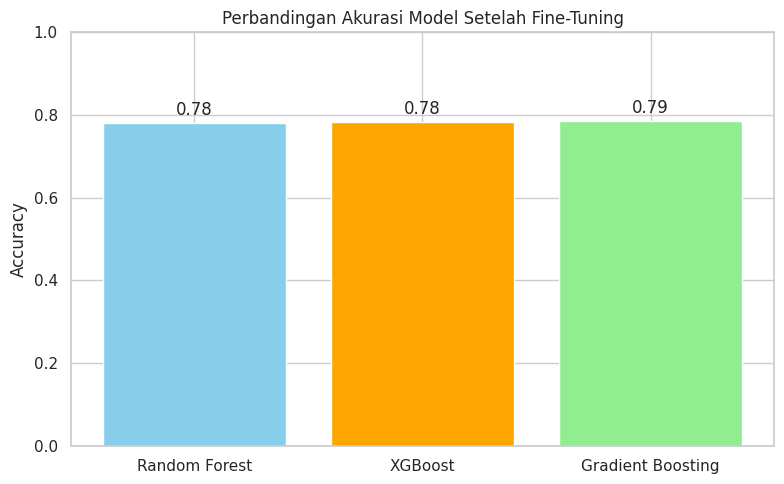

In [88]:
# -------------------- FINE-TUNING RANDOM FOREST --------------------
param_grid_rf = {
    'n_estimators': [100],
    'max_depth': [None],
    'min_samples_split': [2],
    'max_features': ['log2']
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("\nBest RF Parameters:", grid_rf.best_params_)
print("Random Forest Accuracy:", acc_rf)
print("Classification Report:\n", classification_report(y_test, y_pred_rf, target_names=['Graduate', 'Enrolled', 'Dropout']))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# -------------------- FINE-TUNING XGBOOST --------------------
param_grid_xgb = {
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'n_estimators': [100, 150],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_xgb = GridSearchCV(
    XGBClassifier(objective='multi:softmax', num_class=3, eval_metric='mlogloss', use_label_encoder=False, random_state=42),
    param_grid_xgb,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid_xgb.fit(X_train, y_train)

best_xgb = grid_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print("\nBest XGBoost Parameters:", grid_xgb.best_params_)
print("XGBoost Accuracy:", acc_xgb)
print("Classification Report:\n", classification_report(y_test, y_pred_xgb, target_names=['Graduate', 'Enrolled', 'Dropout']))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

# -------------------- FINE-TUNING GRADIENT BOOSTING --------------------
param_grid_gbm = {
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 150],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

grid_gbm = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gbm, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_gbm.fit(X_train, y_train)

best_gbm = grid_gbm.best_estimator_
y_pred_gbm = best_gbm.predict(X_test)
acc_gbm = accuracy_score(y_test, y_pred_gbm)
print("\nBest GBM Parameters:", grid_gbm.best_params_)
print("GBM Accuracy:", acc_gbm)
print("Classification Report:\n", classification_report(y_test, y_pred_gbm, target_names=['Graduate', 'Enrolled', 'Dropout']))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gbm))

# -------------------- VISUALISASI PERBANDINGAN --------------------
models = ['Random Forest', 'XGBoost', 'Gradient Boosting']
accuracies = [acc_rf, acc_xgb, acc_gbm]

plt.figure(figsize=(8, 5))
bars = plt.bar(models, accuracies, color=['skyblue', 'orange', 'lightgreen'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Perbandingan Akurasi Model Setelah Fine-Tuning')

# Tampilkan nilai akurasi di atas bar
for bar, acc in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f'{acc:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Hasil Fine-Tuning Model Prediksi**
Setelah melakukan fine-tuning terhadap tiga model prediksi yaitu Random Forest, XGBoost, dan GBM, kami memperoleh hasil yang menunjukkan performa masing-masing model dalam memprediksi status mahasiswa, dengan kategori Graduate, Enrolled, dan Dropout.

1. Random Forest (RF)
  <br>Setelah melakukan pencarian hyperparameter dengan GridSearchCV, parameter terbaik untuk model Random Forest adalah:
  - max_depth: None
  - max_features: 'log2'
  - min_samples_split: 2
  - n_estimators: 100
  - Model Random Forest menghasilkan akurasi sebesar 77.96% pada data uji.
  - Menunjukkan hasil klasifikasi yang cukup baik pada kelas Graduate dan Dropout, dengan masing-masing precision 0.79 dan 0.84, serta recall 0.92 dan 0.80. Namun, model kurang optimal dalam memprediksi kelas Enrolled, dengan recall yang rendah yakni 0.36, yang menunjukkan model kesulitan dalam mendeteksi status mahasiswa yang sedang terdaftar.
  - Confusion Matrix juga menunjukkan bahwa model memiliki prediksi yang benar untuk mayoritas kelas Graduate dan Dropout, tetapi sering salah dalam mengklasifikasikan Enrolled sebagai Graduate atau Dropout.

2. XGBoost
  <br>Setelah fine-tuning, parameter terbaik untuk model XGBoost adalah:
  - colsample_bytree: 0.8
  - learning_rate: 0.1
  - max_depth: 5
  - n_estimators: 150
  - subsample: 1.0
  - Model XGBoost memperoleh akurasi sebesar 78.30%, sedikit lebih tinggi dibandingkan Random Forest.
  - Hasil Klasifikasi menunjukkan bahwa XGBoost memiliki performa yang cukup baik pada kelas Graduate dan Dropout, dengan precision masing-masing 0.80 dan 0.84, serta recall masing-masing 0.91 dan 0.78. Namun, kelas Enrolled masih menjadi tantangan, dengan recall yang lebih rendah (0.43) meskipun precision-nya relatif baik (0.57).
  - Confusion Matrix menunjukkan bahwa XGBoost berhasil dengan baik dalam mengklasifikasikan Graduate dan Dropout, tetapi masih ada kebingungan dalam memprediksi kelas Enrolled, yang menyebabkan banyak kesalahan dalam pengklasifikasian.

3. Gradient Boosting Machine (GBM)
  <br>Untuk model GBM, parameter terbaik yang ditemukan adalah:
  - learning_rate: 0.1
  - max_depth: 3
  - n_estimators: 150
  - subsample: 0.8
  - Model GBM menghasilkan akurasi sebesar 78.53%, yang sedikit lebih tinggi dibandingkan dengan XGBoost dan Random Forest.
  - GBM memiliki performa yang cukup baik, terutama pada kelas Graduate dan Dropout, dengan precision 0.81 dan 0.83, serta recall 0.90 dan 0.80. Kelas Enrolled kembali menjadi tantangan, dengan recall yang cukup rendah (0.43), meskipun precision-nya juga lebih baik (0.58).
  - Confusion Matrix menunjukkan bahwa model GBM berhasil mengklasifikasikan sebagian besar data dengan benar, terutama untuk Graduate dan Dropout, tetapi masih kesulitan dalam membedakan Enrolled dari kelas lainnya.

**Kesimpulan**
<br>Dari hasil fine-tuning, dapat dilihat bahwa GBM memberikan akurasi terbaik (78.53%) diikuti oleh XGBoost (78.31%) dan Random Forest (77.97%). Ketiga model menunjukkan performa yang cukup baik pada kelas Graduate dan Dropout, namun kesulitan dalam memprediksi kelas Enrolled, yang terindikasi dari nilai recall yang lebih rendah untuk kelas ini.

---


**Permutation Importance**
<br>Untuk memahami sejauh mana kontribusi masing-masing fitur terhadap performa model Gradient Boosting Machine (GBM) yang telah dioptimasi, dilakukan analisis Permutation Feature Importance. Pendekatan ini digunakan karena memberikan interpretasi yang lebih intuitif terhadap pentingnya suatu fitur dalam prediksi, dengan mengukur penurunan akurasi model ketika nilai dari suatu fitur diacak secara acak.

<br>Dengan menggunakan teknik ini, model tidak hanya dapat mencapai performa yang baik, tetapi juga memberikan transparansi dalam menjelaskan alasan di balik prediksi yang dihasilkan. Hal ini sangat penting terutama dalam konteks sistem pendukung keputusan, di mana interpretabilitas model menjadi faktor krusial.

In [89]:
# Hitung permutation importance
result = permutation_importance(best_gbm, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Buat DataFrame hasil
perm_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Mean Importance': result.importances_mean,
    'Std Deviation': result.importances_std
}).sort_values(by='Mean Importance', ascending=False)

# Tampilkan top 10
print("=== Permutation Feature Importance ===")
print(perm_df.head(10).to_string(index=False))

=== Permutation Feature Importance ===
                             Feature  Mean Importance  Std Deviation
   Curricular_units_2nd_sem_approved         0.201356       0.012621
   Curricular_units_1st_sem_approved         0.057288       0.012118
             Tuition_fees_up_to_date         0.042825       0.006031
   Curricular_units_2nd_sem_enrolled         0.028927       0.005400
   Curricular_units_1st_sem_enrolled         0.020339       0.002423
                              Course         0.016497       0.004017
                   Age_at_enrollment         0.013785       0.005124
Curricular_units_1st_sem_evaluations         0.012090       0.002263
Curricular_units_2nd_sem_evaluations         0.010847       0.005183
                   Unemployment_rate         0.010621       0.004353


Berdasarkan hasil analisis Permutation Feature Importance pada model Gradient Boosting Machine (GBM), diperoleh sepuluh fitur teratas yang paling berpengaruh terhadap prediksi status mahasiswa.

Nilai Mean Importance menunjukkan seberapa besar penurunan akurasi model ketika fitur tersebut diacak, sedangkan Std Deviation menunjukkan seberapa konsisten pengaruh fitur tersebut selama 10 kali pengulangan proses permutasi.

Dari hasil yang ditampilkan, dapat disimpulkan bahwa fitur `Curricular_units_2nd_sem_approved` merupakan fitur yang paling penting, dengan nilai Mean Importance sebesar 0.201. Artinya, ketika nilai dari fitur ini diacak, akurasi model menurun secara signifikan, menunjukkan bahwa jumlah mata kuliah semester 2 yang disetujui sangat berkontribusi terhadap klasifikasi status mahasiswa (lulus, keluar, atau masih aktif).

Fitur kedua yang paling berpengaruh adalah `Curricular_units_1st_sem_approved`, dengan nilai Mean Importance sebesar 0.057. Ini menunjukkan bahwa keberhasilan mahasiswa di semester awal juga merupakan indikator penting untuk menentukan kelanjutan status studinya.

Fitur lainnya yang juga memiliki pengaruh signifikan meliputi:
1. `Tuition_fees_up_to_date`: Ketepatan pembayaran biaya kuliah (0.042),
2. `Curricular_units_2nd_sem_enrolled` dan `1st_sem_enrolled`: Jumlah mata kuliah yang diambil pada semester 1 dan 2 (masing-masing sekitar 0.028 dan 0.020),
3. `Course`: Program studi mahasiswa (0.016),
4. `Age_at_enrollment`: Usia saat masuk kuliah (0.013),
5. Evaluasi mata kuliah pada semester pertama dan kedua, serta
6. `Unemployment_rate`: Tingkat pengangguran nasional saat tahun masuk.

Dari keseluruhan hasil ini, terlihat bahwa performa akademik di semester awal, kepatuhan administratif (seperti pembayaran), serta informasi demografis memiliki pengaruh nyata terhadap hasil klasifikasi model. Informasi ini sangat penting untuk mendukung proses pengambilan keputusan dalam sistem prediktif status mahasiswa, karena memungkinkan pihak institusi untuk fokus pada faktor-faktor paling menentukan dalam mencegah dropout atau mengoptimalkan lulus tepat waktu.

# Evaluation

1. (GBM) memberikan performa terbaik dengan akurasi sebesar 78.5%, sedikit lebih tinggi dari XGBoost (78.3%) dan Random Forest (77.9%).
<br>Selain itu terdapat hal unik yang ditemukan yakni menurunnya akurasi pada model Random Forest saat finetuning, hal ini dapat terjadi sebab Model baseline default Random Forest sering kali sudah cukup optimal karena Random Forest relatif stabil terhadap parameter kecil. Namun tetap perlu fine tuning untuk menghasilkan nilai precision dan recall yang tinggi untuk meminimalisir kasus imbalance class.

2. Setelah dilakukan fine-tuning menggunakan GridSearchCV, 2 model mengalami peningkatan performa kecuali Random Forest, menunjukkan bahwa penyesuaian parameter memberikan dampak signifikan terhadap akurasi dan f1-score, khususnya untuk kelas minoritas seperti "Enrolled".

3. Analisis Permutation Feature Importance menunjukkan bahwa fitur paling berpengaruh terhadap prediksi status mahasiswa adalah:
  - Jumlah mata kuliah semester 2 yang disetujui,
  - Jumlah mata kuliah semester 1 yang disetujui,
  - Ketepatan pembayaran biaya kuliah.
  <br> Hal ini mengindikasikan bahwa performa akademik awal dan kepatuhan administratif merupakan indikator kunci dalam menentukan status kelulusan mahasiswa.

Selanjutnya adalah, hasil pemodelan ini nantinya dapat digunakan untuk membantu Jaya Jaya Institut dalam mendeteksi secepat mungkin siswa yang mungkin akan melakukan dropout sehingga dapat diberi bimbingan khusus.